In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
df=pd.read_csv('ALgerian_Forest_fire_updatedd.csv')

In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [21]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [22]:
#Encoding To Train Our Model

df['Classes']=df['Classes'].astype(str)
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [23]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [24]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [25]:
X=df.drop('FWI',axis=1)

In [26]:
y=df['FWI']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
#Now we will exclude those features ,such are highly
# correlated  via threshold(Set by Domain Experts)

<Axes: >

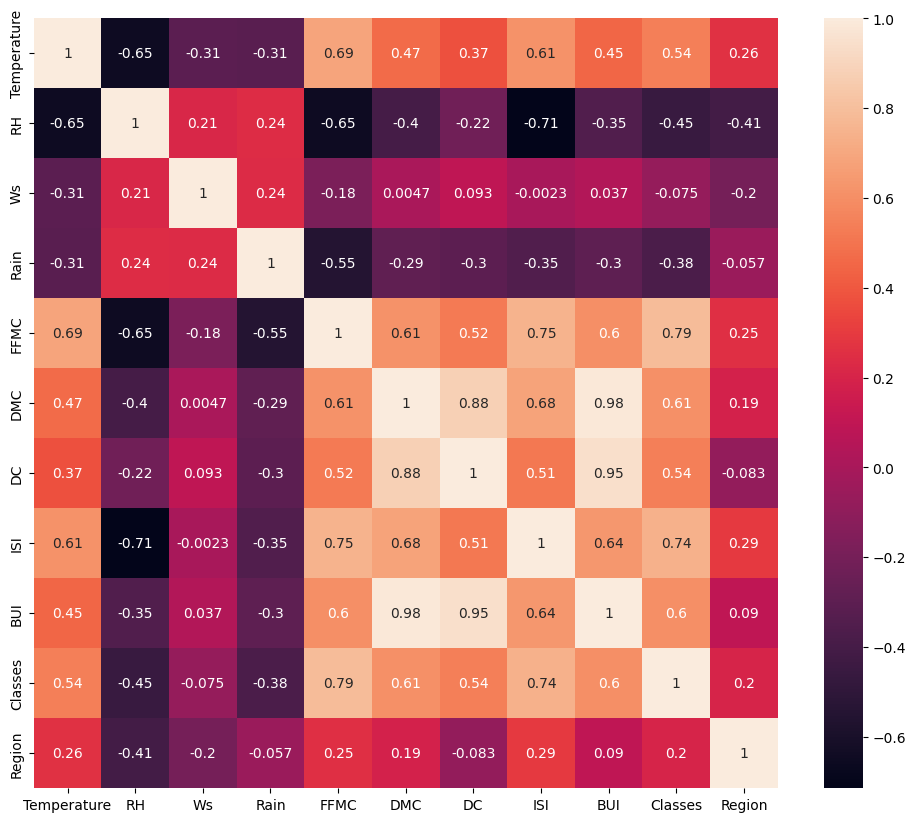

In [30]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(),annot=True)

In [31]:
#Function to remove such columns like
#Bui >0.85
#DMC >0.85
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [32]:
drop_col=correlation(X_train,0.85)
X_train.drop(drop_col,axis=1,inplace=True)
X_test.drop(drop_col,axis=1,inplace=True)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# ***Linear Regression Model***

In [34]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)

Mean Absolute Error is 0.5049978694165687
R_2 Score is/ Accuracy  is 98.05895859259883


Text(0.5, 1.0, 'Multiple Linear Regression')

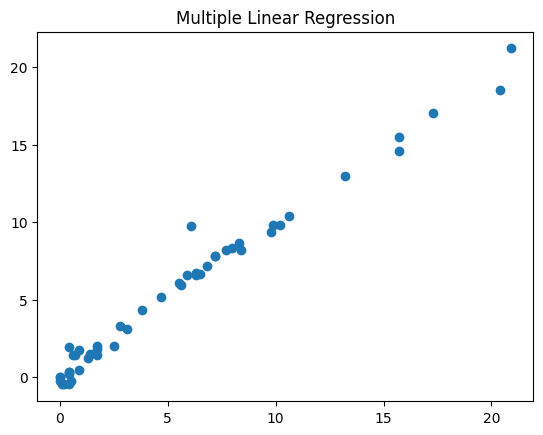

In [35]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Mean Absolute Error is {mae}")
print(f"R_2 Score is/ Accuracy  is {score*100}")
plt.scatter(y_test,y_pred)
plt.title("Multiple Linear Regression")

# ***Lasso Regression***

Mean Absolute Error is 1.0093958923873407
R_2 Score is/ Accuracy  is 94.30507350726562


Text(0.5, 1.0, 'Lasso Regression (Feature Selection L1 Regularization)')

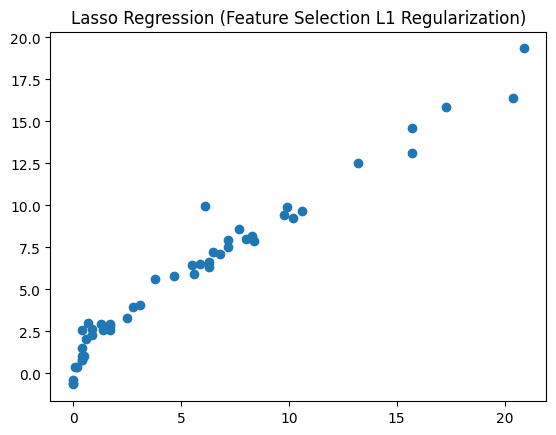

In [36]:
from sklearn.linear_model import Lasso
regression_l=Lasso()
regression_l.fit(X_train_scaled,y_train)
y_pred=regression_l.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Mean Absolute Error is {mae}")
print(f"R_2 Score is/ Accuracy  is {score*100}")
plt.scatter(y_test,y_pred)
plt.title("Lasso Regression (Feature Selection L1 Regularization)")

# ***LASSO CROSS VALIDATION***

In [43]:
from sklearn.linear_model import LassoCV
lasssocv=LassoCV(cv=5)
lasssocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [46]:
lasssocv.alpha_

lasssocv.predict(X_train_scaled).mean()

np.float64(7.420103092783505)

In [ ]:
lasssocv.mse_path_ #100 alpha * no of cross validatio(5)         100*5=500

array([[68.58934997, 64.28650232, 49.25415197, 79.11474083, 38.68688171],
       [63.2664675 , 58.77362304, 43.20292636, 77.07183352, 34.66910628],
       [56.87389457, 51.79652473, 37.15764773, 69.4806422 , 31.16497557],
       [51.2737596 , 45.69461734, 31.98560721, 62.80993539, 27.46286399],
       [45.36816855, 40.35928545, 27.56726322, 56.94442062, 23.75447628],
       [39.875005  , 35.69250404, 23.79907917, 50.31847875, 20.54655878],
       [35.0794232 , 31.60885664, 20.59132915, 44.35263414, 17.77349727],
       [30.89154006, 28.0342798 , 17.86626498, 39.14265375, 15.37720198],
       [27.23334321, 24.90389594, 15.55674604, 34.59116894, 13.30754905],
       [24.03652419, 22.16129069, 13.60451947, 30.61376519, 11.52101422],
       [21.24273995, 19.75730052, 11.95924131, 27.13693185,  9.97950732],
       [18.80004176, 17.64896267, 10.57738151, 24.09623192,  8.65087048],
       [16.66356323, 15.79916526,  9.42117661, 21.43679316,  7.50627555],
       [14.79422393, 14.17520895,  8.4

0.978328234520343


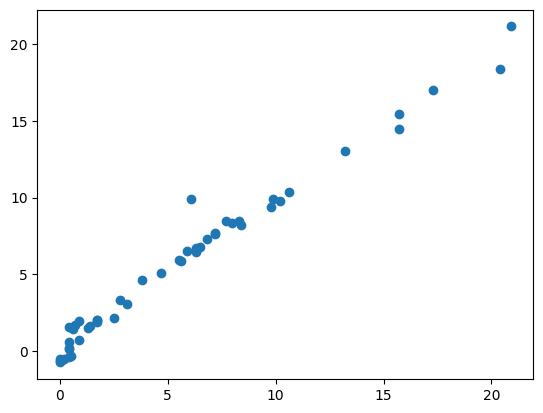

In [47]:
y_pred=lasssocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(score)

# ***Ridge Regression***

Mean Absolute Error is 0.5192048325844797
R_2 Score is/ Accuracy  is 98.010580632736


Text(0.5, 1.0, 'Ridge Regression (reduces overfitting L2 Regularization)')

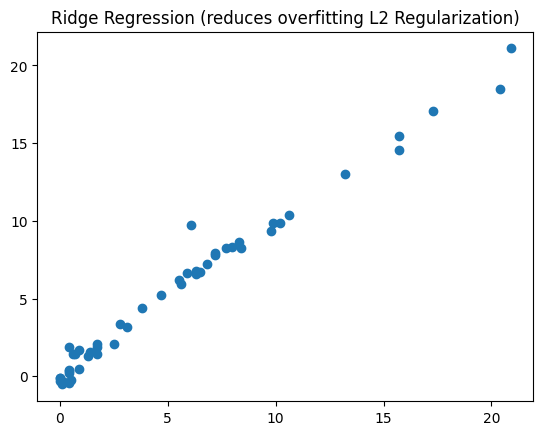

In [48]:
from sklearn.linear_model import Ridge
regression_r=Ridge()
regression_r.fit(X_train_scaled,y_train)
y_pred=regression_r.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Mean Absolute Error is {mae}")
print(f"R_2 Score is/ Accuracy  is {score*100}")
plt.scatter(y_test,y_pred)
plt.title("Ridge Regression (reduces overfitting L2 Regularization)")

# ***Ridge Regression Cross Validation***

0.9722193780965623 0.5192048325844797


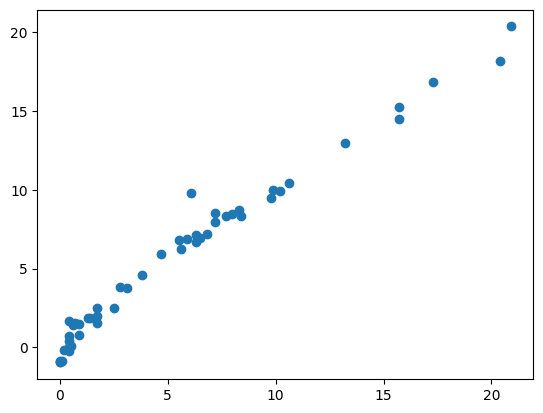

In [49]:
from sklearn.linear_model import RidgeCV
ridgeCv=RidgeCV(cv=5)
ridgeCv.fit(X_train_scaled,y_train)
mae=mean_absolute_error(y_test,y_pred)
y_pred=ridgeCv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(score,mae)

# ***ElasticNet***

Mean Absolute Error is 1.6834416340136709
R_2 Score is/ Accuracy  is 86.76961352267807


Text(0.5, 1.0, 'Elastic Net (L1 & L2 Regularization)')

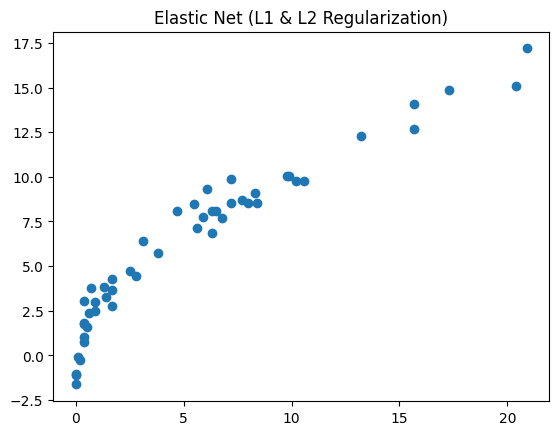

In [50]:
from sklearn.linear_model import ElasticNet
regression_E=ElasticNet()
regression_E.fit(X_train_scaled,y_train)
y_pred=regression_E.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Mean Absolute Error is {mae}")
print(f"R_2 Score is/ Accuracy  is {score*100}")
plt.scatter(y_test,y_pred)
plt.title("Elastic Net (L1 & L2 Regularization)")

# ***Elastic Net CV***

Mean Absolute Error is 0.5710147088777218
R_2 Score is/ Accuracy  is 97.81014571778188


Text(0.5, 1.0, 'Elastic Net CV (L1 & L2 Regularization)')

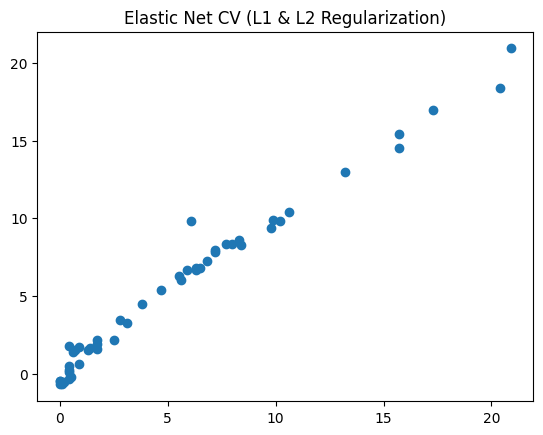

In [51]:
from sklearn.linear_model import ElasticNetCV
regression_Ec=ElasticNetCV()#by default ratio of 50 50 l1 & l2
regression_Ec.fit(X_train_scaled,y_train)
y_pred=regression_Ec.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print(f"Mean Absolute Error is {mae}")
print(f"R_2 Score is/ Accuracy  is {score*100}")
plt.scatter(y_test,y_pred)
plt.title("Elastic Net CV (L1 & L2 Regularization)")

In [52]:
scaler

StandardScaler()

In [54]:
regression_r

Ridge()

In [55]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(regression_r,open('ridge.pkl','wb'))
